### Examples of Questions That Primarily Use Google Trends and Redis

**How do real life events impact public awareness and visibility of art topics?**


These questions follow from investigating the idea that real-life events impact art-related popularity trends. We can analyze how catastrophic events can paradoxically increase the visibility and cultural relevance of art institutions, potentially changing visitation patterns, online searches, social media engagement, and public discourse about cultural preservation. An example of a current catastrophic event is the LA wildfires.


In [ ]:
import sys
sys.path.append('../')

In [17]:
import trends.trends_to_redis as trends_to_redis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy import stats
from scipy.stats import pearsonr
import psycopg2

In [ ]:
DOWNLOADS_FOLDER_FP = "<YOUR DOWNLOADS FOLDER>"
YOUR_USERNAME = "<YOUR USERNAME>"

**1. How did the Los Angeles wildfires impact public awareness and visibility of The Getty Museum?**

The fires nearly destroyed the Getty Museum and its priceless collections, and likely generated substantial media coverage and public interest. We can investigate if this is true using our redis integration.

In [3]:
# Artist/Artwork/Movement/Place/School/Occupation to search for
entity_type = "Place"
entity_name = "The Getty"
entity_id = "The_Getty_Museum"

df = trends_to_redis.scrape_entity(entity_name, entity_type, entity_id, DOWNLOADS_FOLDER_FP)

Successfully connected to Redis
Retrieved 53 data points for trends:Place:The_Getty_Museum
2024-03-17: 12
2024-03-24: 14
2024-03-31: 12
2024-04-07: 11
2024-04-14: 11
Data found in Redis


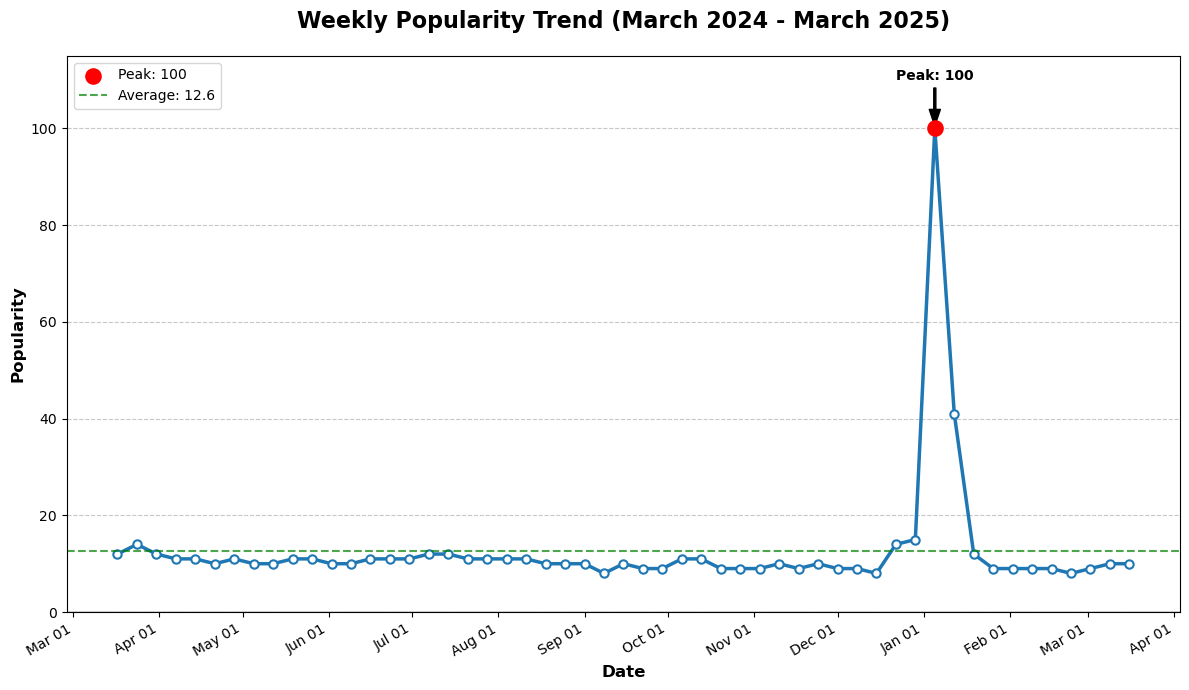

In [12]:
# Convert 'Week' to datetime format
df['Week'] = pd.to_datetime(df['Week'])

# Create the figure and axis with improved size
plt.figure(figsize=(12, 7))

# Create a line graph with improved styling
plt.plot(df['Week'], df['Popularity'], linewidth=2.5, color='#1f77b4', marker='o', 
         markersize=6, markerfacecolor='white', markeredgecolor='#1f77b4', markeredgewidth=1.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the peak value
max_popularity_idx = df['Popularity'].idxmax()
max_date = df.loc[max_popularity_idx, 'Week']
max_value = df.loc[max_popularity_idx, 'Popularity']
plt.scatter(max_date, max_value, s=120, color='red', zorder=5, label=f'Peak: {max_value}')

# Configure the date formatting on x-axis
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%b %d')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis to show a tick every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Add labels and title with improved styling
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.title('Weekly Popularity Trend (March 2024 - March 2025)', fontsize=16, fontweight='bold', pad=20)

# Add annotations for key points
plt.annotate(f'Peak: {max_value}', 
             xy=(max_date, max_value), 
             xytext=(max_date, max_value + 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             ha='center', fontsize=10, fontweight='bold')

# Calculate average popularity
avg_popularity = df['Popularity'].mean()
plt.axhline(y=avg_popularity, color='green', linestyle='--', alpha=0.7, label=f'Average: {avg_popularity:.1f}')

# Add legend
plt.legend(loc='upper left')

# Add some padding to y-axis for better visualization
y_max = df['Popularity'].max() * 1.15
plt.ylim(0, y_max)

# Tight layout to optimize space usage
plt.tight_layout()

# Save the plot (optional)
plt.savefig('popularity_trend.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [6]:
max_row_index = df['Popularity'].idxmax()
max_row = df.loc[max_row_index]
max_row

Week          2025-01-05 00:00:00
Popularity                    100
Name: 42, dtype: object

After scraping popularity data for The Getty and populating redis. We find that the time with most interest was during the fires. **We see that the Los Angeles wildfires that threatened The Getty Museum altered public perception and awareness of this cultural institution.**

**2. How did the LA wildfires impact the popularity of marginalized artists?**

LA wildfires damaged art and culture, and had impacts on marginalized artists like Christina Quarles. “Christina Quarles is a queer, mixed contemporary American artist and writer, living and working in Los Angeles, whose gestural, abstract paintings confront themes of racial and sexual identities, gender, and queerness.” - Wikipedia 

We can investigate this question by comparing the popularity of Christina Quarles before and after the fires.


In [ ]:
# Artist/Artwork/Movement/Place/School/Occupation to search for
entity_type = "Artist"
entity_name = "Christina Quarles"
entity_id = "Christina_Quarles_1985"

df = trends_to_redis.scrape_entity(entity_name, entity_type, entity_id, DOWNLOADS_FOLDER_FP)

In [ ]:
# Google is giving us an issue so manually download and insert
df =  trends_to_redis.process_scrape(DOWNLOADS_FOLDER_FP, "multiTimeline.csv", entity_name)
trends_to_redis.insert_trend_data_from_dataframe(df, entity_type, entity_id)

df = trends_to_redis.retreive_from_redis(entity_type, entity_id)

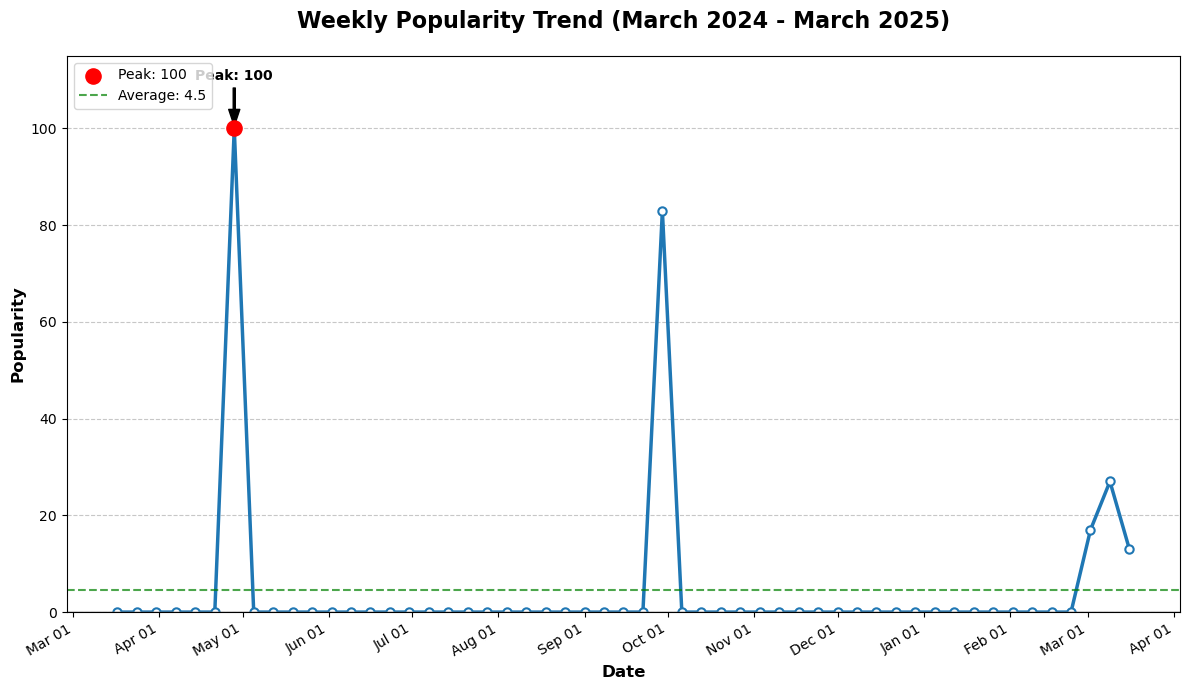

In [15]:
# Convert 'Week' to datetime format
df['Week'] = pd.to_datetime(df['Week'])

# Create the figure and axis with improved size
plt.figure(figsize=(12, 7))

# Create a line graph with improved styling
plt.plot(df['Week'], df['Popularity'], linewidth=2.5, color='#1f77b4', marker='o', 
         markersize=6, markerfacecolor='white', markeredgecolor='#1f77b4', markeredgewidth=1.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the peak value
max_popularity_idx = df['Popularity'].idxmax()
max_date = df.loc[max_popularity_idx, 'Week']
max_value = df.loc[max_popularity_idx, 'Popularity']
plt.scatter(max_date, max_value, s=120, color='red', zorder=5, label=f'Peak: {max_value}')

# Configure the date formatting on x-axis
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%b %d')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis to show a tick every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Add labels and title with improved styling
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.title('Weekly Popularity Trend (March 2024 - March 2025)', fontsize=16, fontweight='bold', pad=20)

# Add annotations for key points
plt.annotate(f'Peak: {max_value}', 
             xy=(max_date, max_value), 
             xytext=(max_date, max_value + 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             ha='center', fontsize=10, fontweight='bold')

# Calculate average popularity
avg_popularity = df['Popularity'].mean()
plt.axhline(y=avg_popularity, color='green', linestyle='--', alpha=0.7, label=f'Average: {avg_popularity:.1f}')

# Add legend
plt.legend(loc='upper left')

# Add some padding to y-axis for better visualization
y_max = df['Popularity'].max() * 1.15
plt.ylim(0, y_max)

# Tight layout to optimize space usage
plt.tight_layout()

# Save the plot (optional)
plt.savefig('popularity_trend.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [23]:
# Convert 'Week' to datetime format
df['Week'] = pd.to_datetime(df['Week'])

# Create a month column for easier filtering
df['Month'] = df['Week'].dt.month
df['Year'] = df['Week'].dt.year
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Split data into before, during, and after January 2025
january_2025_mask = (df['Year'] == 2025) & (df['Month'] == 1)
before_january_mask = (df['Year'] < 2025) | ((df['Year'] == 2025) & (df['Month'] < 1))
after_january_mask = (df['Year'] > 2025) | ((df['Year'] == 2025) & (df['Month'] > 1))

# Create the datasets
before_january_data = df[before_january_mask]
january_data = df[january_2025_mask]
after_january_data = df[after_january_mask]

# Calculate statistics
before_mean = before_january_data['Popularity'].mean()
before_median = before_january_data['Popularity'].median()
before_std = before_january_data['Popularity'].std()

january_mean = january_data['Popularity'].mean()
january_median = january_data['Popularity'].median()
january_std = january_data['Popularity'].std()

after_mean = after_january_data['Popularity'].mean()
after_median = after_january_data['Popularity'].median()
after_std = after_january_data['Popularity'].std()

# Print statistical comparison
print("\n=== Statistical Comparison ===")
print(f"Before January 2025 (n={len(before_january_data)}):")
print(f"  Mean: {before_mean:.2f}")
print(f"  Median: {before_median:.2f}")
print(f"  Standard Deviation: {before_std:.2f}")
print(f"\nJanuary 2025 (n={len(january_data)}):")
print(f"  Mean: {january_mean:.2f}")
print(f"  Median: {january_median:.2f}")
print(f"  Standard Deviation: {january_std:.2f}")
print(f"\nAfter January 2025 (n={len(after_january_data)}):")
print(f"  Mean: {after_mean:.2f}")
print(f"  Median: {after_median:.2f}")
print(f"  Standard Deviation: {after_std:.2f}")

# Perform t-test between before and after January (excluding January)
t_stat, p_value = stats.ttest_ind(before_january_data['Popularity'], 
                                  after_january_data['Popularity'], 
                                  equal_var=False)
print(f"\nT-test (Before vs After, excluding January):")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Statistically significant difference: {'Yes' if p_value < 0.05 else 'No'}")



=== Statistical Comparison ===
Before January 2025 (n=42):
  Mean: 4.36
  Median: 0.00
  Standard Deviation: 19.81

January 2025 (n=4):
  Mean: 0.00
  Median: 0.00
  Standard Deviation: 0.00

After January 2025 (n=7):
  Mean: 8.14
  Median: 0.00
  Standard Deviation: 10.98

T-test (Before vs After, excluding January):
  t-statistic: -0.7346
  p-value: 0.4750
  Statistically significant difference: No


**We find that there was no significant difference in popularity before and after the wildfires for this particular artist, but the trend seen starting in march is likely as a result of the wildfires’ impact when she opened up about it publicly.**

**3. Did artists born in LA (postgres) follow a similar popularity trend surrounding the fire?**

This question examines whether artists with Los Angeles origins experienced popularity trends similar to The Getty Museum during the wildfire crisis. 

In [ ]:
# Connect to Postgres
conn = psycopg2.connect(
    dbname="dbname",
    user="user",
    password="password",
    host="host",
    port="port"
)
cursor = conn.cursor()

In [4]:
cursor.execute("""SELECT artist_name, birth_year FROM Artist_Birth_Places WHERE place_name ILIKE 'Los Angeles';""")
existing_artists = set(cursor.fetchall())

In [5]:
# Close the connection
cursor.close()
conn.close()

In [ ]:
interested_entities = []
for row in existing_artists:
    artist_name, birth_year = row
    artist_name_key = artist_name.replace(' ', '_')+ '_' + str(birth_year)
    interested_entities.append(("artist", artist_name, artist_name_key))
#interested_entities

In [ ]:
# remove strange entities
interested_entities.remove(('artist', 'Son', 'Son_2000'))
interested_entities.remove(('artist', 'Retna', 'Retna_1979'))
interested_entities.remove(('artist', 'Randall', 'Randall_1924'))

In [ ]:
# remove Eric Zammit for not enought interest
interested_entities.remove(('artist', 'Eric Zammitt', 'Eric_Zammitt_1960'))

In [ ]:
entity_data = {}
for entity in interested_entities:
    # Artist/Artwork/Movement/Place/School/Occupation to search for
    entity_type = entity[0]
    entity_name = entity[1]
    entity_id = entity[2]

    df = trends_to_redis.scrape_entity(entity_name, entity_type, entity_id, DOWNLOADS_FOLDER_FP)
    entity_data[entity_id] = df

In [28]:
# identify artists we couldn't scrape
for entity_id, df in entity_data.items():
    if df is None:
        print(entity_id)

In [29]:
# for artists that we couldn't scrape, manually download and insert
for curr_entity in interested_entities:
    entity_id = curr_entity[2]
    if entity_data[entity_id] is None:
        df = trends_to_redis.process_scrape(DOWNLOADS_FOLDER_FP, str(entity_id)+".csv", entity_id)
        trends_to_redis.insert_trend_data_from_dataframe(df, "artist", entity_id)
        df = trends_to_redis.retreive_from_redis("artist", entity_id)
        entity_data

In [30]:
def compare_popularity_trends(entity_dataframes):
    """
    Compare popularity trends across multiple entities.
    
    Parameters:
    -----------
    entity_dataframes : dict
        Dictionary with keys as entity_id and values as dataframes
        Each dataframe has 'Week' (date as string) and 'Popularity' columns
    
    Returns:
    --------
    Dictionary containing correlation matrix and visualization
    """
    
    # Step 1: Convert all dataframes to a common format with datetime index
    processed_dfs = {}
    for entity_id, df in entity_dataframes.items():
        if df is None:
            continue
        # Convert week string to datetime
        temp_df = df.copy()
        
        # Convert the 'Week' column to datetime
        temp_df['date'] = pd.to_datetime(temp_df['Week'])
        
        # Set date as index and sort
        temp_df = temp_df[['Popularity', 'date']]
        temp_df = temp_df.set_index('date').sort_index()
        processed_dfs[entity_id] = temp_df
    
    # Step 2: Create a combined dataframe with all entities
    combined_df = pd.DataFrame()
    for entity_id, df in processed_dfs.items():
        combined_df[f'{entity_id}'] = df['Popularity']  # Using actual entity_id as column name
    
    # Step 3: Calculate correlations between entity popularity trends
    correlation_matrix = combined_df.corr()
    
    # Step 4: Visualize trends
    plt.figure(figsize=(14, 8))
    
    # Plot each entity's popularity
    for entity_id in processed_dfs.keys():
        plt.plot(combined_df.index, combined_df[entity_id], 
                 label=entity_id, linewidth=2)
    
    plt.title('Popularity Trends Comparison', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Popularity (0-100)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Step 5: Calculate overall similarity metric (average correlation)
    # Excluding self-correlations (diagonal)
    mask = ~np.eye(correlation_matrix.shape[0], dtype=bool)
    avg_correlation = correlation_matrix.values[mask].mean()
    
    # Return results
    results = {
        'correlation_matrix': correlation_matrix,
        'average_correlation': avg_correlation,
        'combined_data': combined_df,
        'interpretation': interpret_similarity(avg_correlation)
    }
    
    return results

def interpret_similarity(avg_correlation):
    """Interpret the similarity based on average correlation"""
    if avg_correlation > 0.7:
        return "Strong similarity in trends"
    elif avg_correlation > 0.4:
        return "Moderate similarity in trends"
    elif avg_correlation > 0.2:
        return "Weak similarity in trends"
    else:
        return "No meaningful similarity in trends"

Correlation Matrix:
                         Isamu_Noguchi_1904  Ken_Price_1935  \
Isamu_Noguchi_1904                 1.***REMOVED***00        0.190717   
Ken_Price_1935                     0.190717        1.***REMOVED***00   
Richards_Ruben_1924                0.201106        0.327696   
Craig_Kauffman_1932                0.029946        0.085506   
Michael_Frimkess_1937              0.029946        0.085506   
Dustin_Yellin_1975                -0.051735        0.002774   
John_Altoon_1925                   0.143647        0.335130   
Alice_Patrick_1948                 0.029946        0.085506   
Tom_Scott_1948                     0.194152        0.060913   
Allan_McCollum_1944                0.031568        0.157532   
Thomas_Hill_1971                  -0.065470       -0.074094   
Kenneth_Price_1935                 0.078653        0.318693   
Judithe_Hernandez_1948             0.051292        0.121660   
Barbara_Bloom_1951                -0.201810       -0.061785   
Betye_Saar_1926  

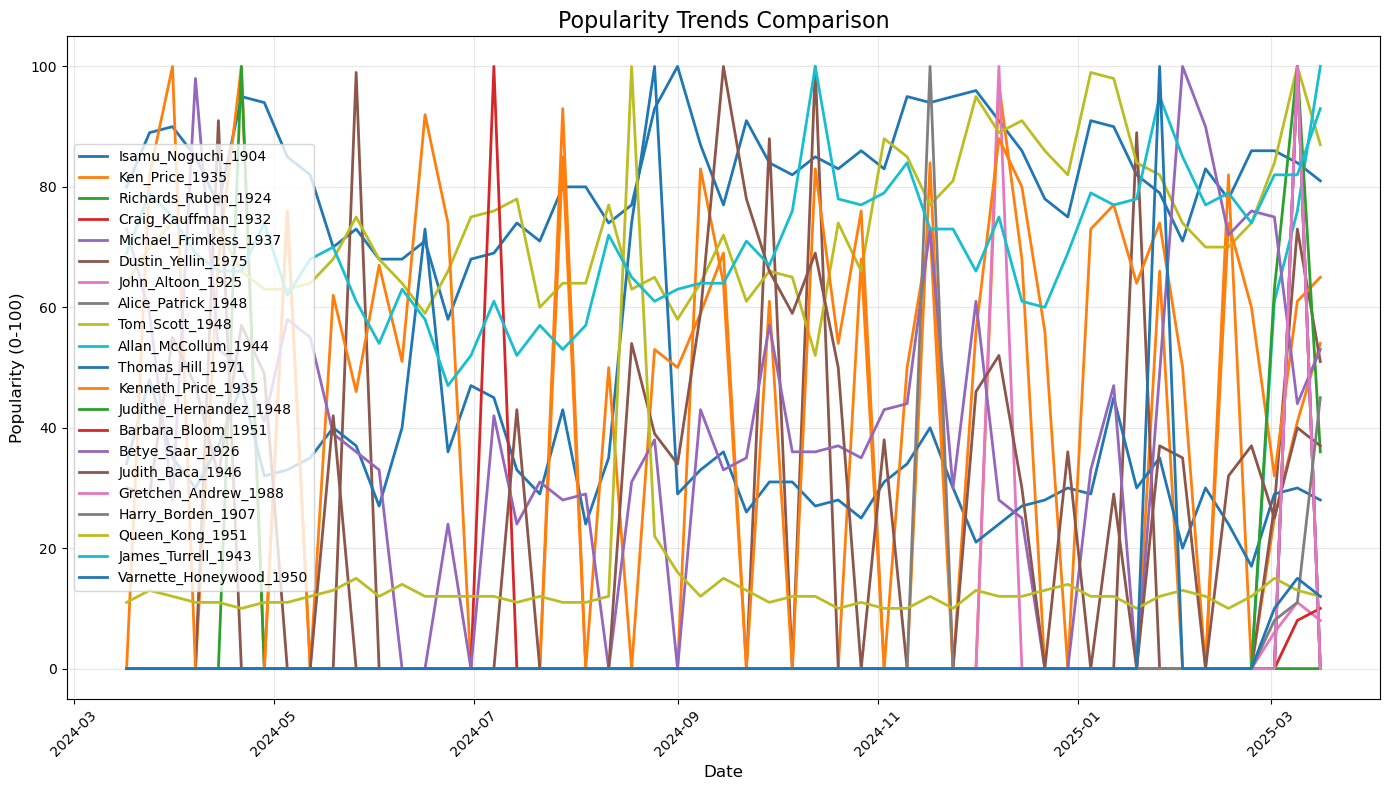

In [31]:
# Compare trends
results = compare_popularity_trends(entity_data)

# Print results
print("Correlation Matrix:")
print(results['correlation_matrix'])
print(f"\nAverage Correlation: {results['average_correlation']:.3f}")
print(f"Interpretation: {results['interpretation']}")

# Show the plot
plt.show()

We find a significant divergence in public attention patterns. While The Getty Museum experienced heightened visibility during the wildfire crisis, artists born in Los Angeles did not demonstrate comparable surges in popularity or public interest. This distinction suggests fascinating nuances in how the public processes cultural significance during disasters. The geographic connection alone (being from Los Angeles) appears insufficient to generate increased attention for individual artists during a localized crisis. Instead, the findings indicate that **public concern may center more specifically on tangible cultural repositories and their physical collections rather than on creative individuals associated with the threatened region.**